In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold.shape

(2290, 6)

In [5]:
gold.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


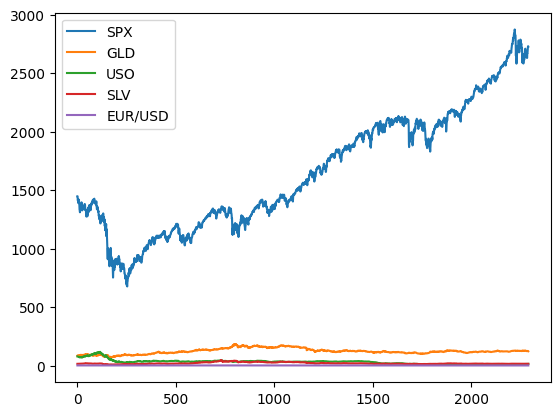

In [8]:
gold.plot()
plt.show()

In [9]:
gold.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


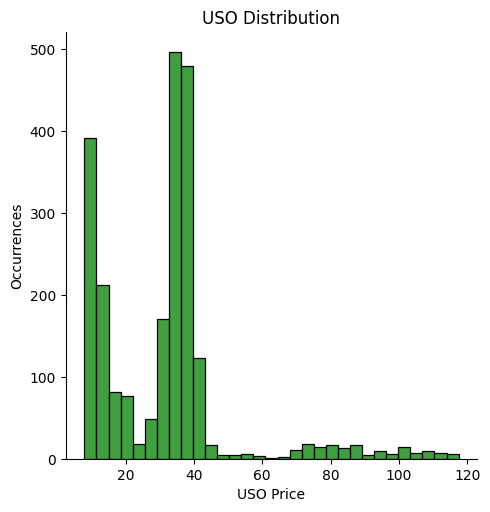

In [11]:
data = gold.drop(['Date'],axis=1)
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

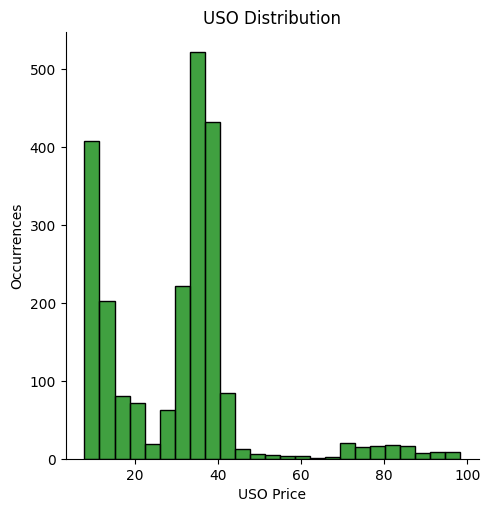

In [12]:
q = data["USO"].quantile(0.98)
data[data["USO"] > q]
data = data[(data["USO"] < q)]
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

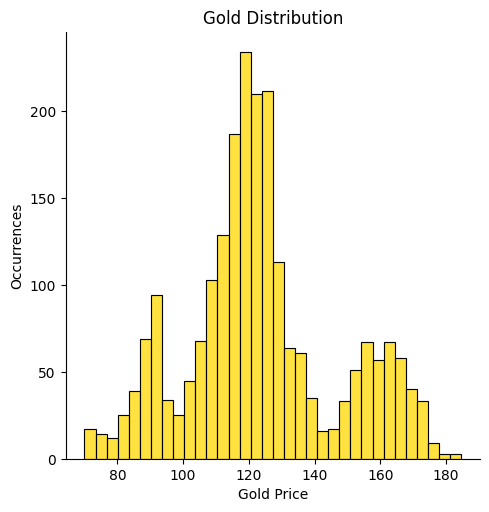

In [13]:
sns.displot(data['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('Gold Price')
plt.ylabel('Occurrences')
plt.show()

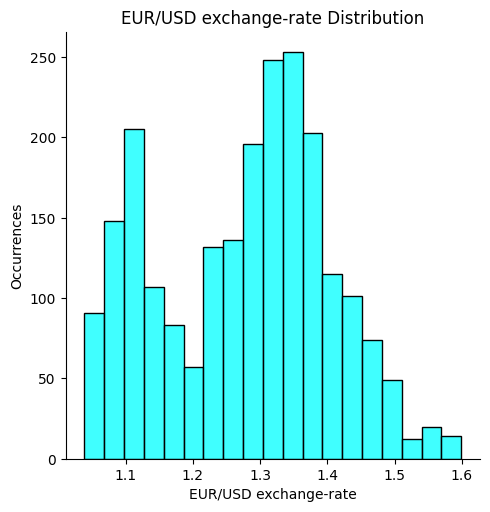

In [14]:
sns.displot(data['EUR/USD'], color='cyan')
plt.title('EUR/USD exchange-rate Distribution')
plt.xlabel('EUR/USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

In [15]:
correlation = data.corr()

<Axes: >

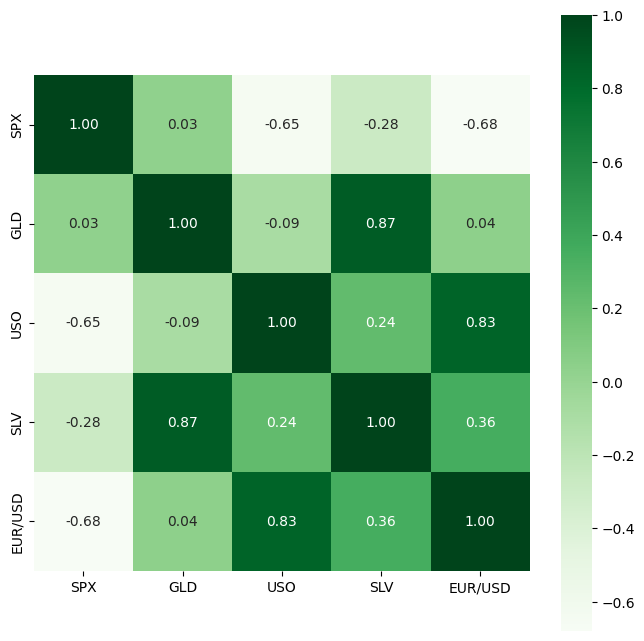

In [16]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [17]:
print(correlation['GLD'])

SPX        0.032141
GLD        1.000000
USO       -0.091204
SLV        0.874769
EUR/USD    0.040271
Name: GLD, dtype: float64


In [18]:
#training
X = data.drop(['GLD'], axis=1)
Y = data['GLD']

In [19]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [20]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
regressor

RandomForestRegressor()

In [26]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
test_data_prediction = regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[ 86.10019952 104.60249795 127.43489672 132.50640084  95.81259959
 125.57670141 165.13630135  91.68879901  76.0597987  120.15400062
 146.68069711 127.04599955 124.9729001  116.24429861 133.64300209
 102.75159929 107.0071998  133.99220083  87.87419915 139.1979999
 112.46920026 124.90790137 117.14409981 114.41360109 117.14830013
 120.15760205 159.87989917 118.75579966 154.4098007  145.9286017
 117.37679953 118.25860127  88.08019978 161.26529756 149.05699994
 117.96360014 110.0018995  111.36700092 160.40569623 111.56299923
 140.55939851 115.15430078 123.15889949  72.37060186 126.03600029
 168.13569915 108.37450016 107.35090106 125.31199952 149.52580197
  94.0234998  160.53169627  90.94699869 112.72920187 109.48429713
  84.36959996 156.78070043 156.11880195 127.94450106 172.20599755
 165.55600222 123.6911989  107.58410101  79.12509981 118.92049924
 128.62999873  93.33109932 154.69240151 126.13730151 138.39040346
 125.54590123 100.90049866 123.82340128 114.39750051 171.33510185
 120.6410001

In [29]:
error_score = metrics.r2_score(Y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score)

R squared error :  0.986565756791268


In [30]:
Y_test = np.array(Y_test)

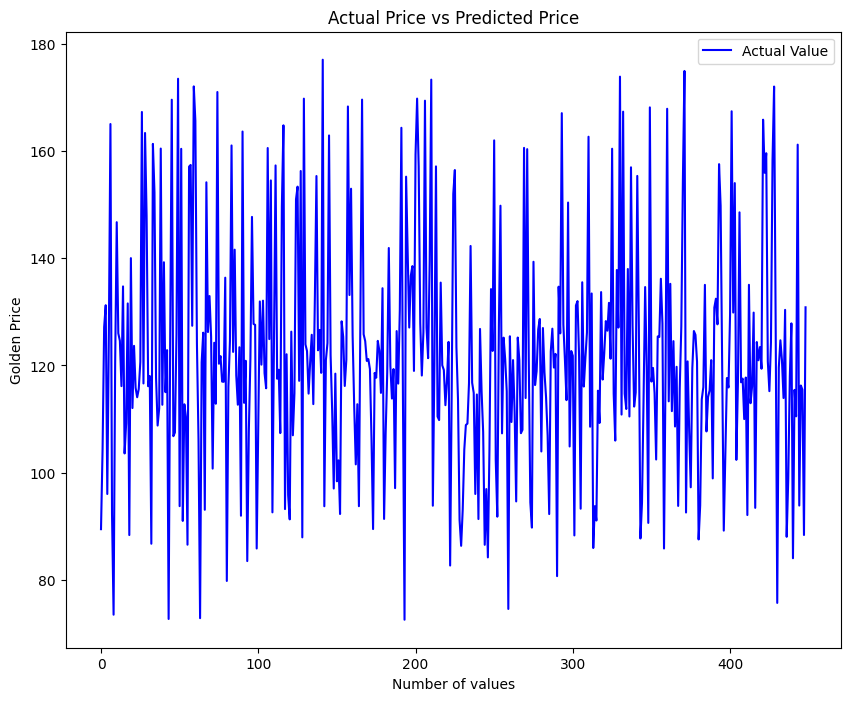

In [31]:
plt.rcParams['figure.figsize'] = [10, 8]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

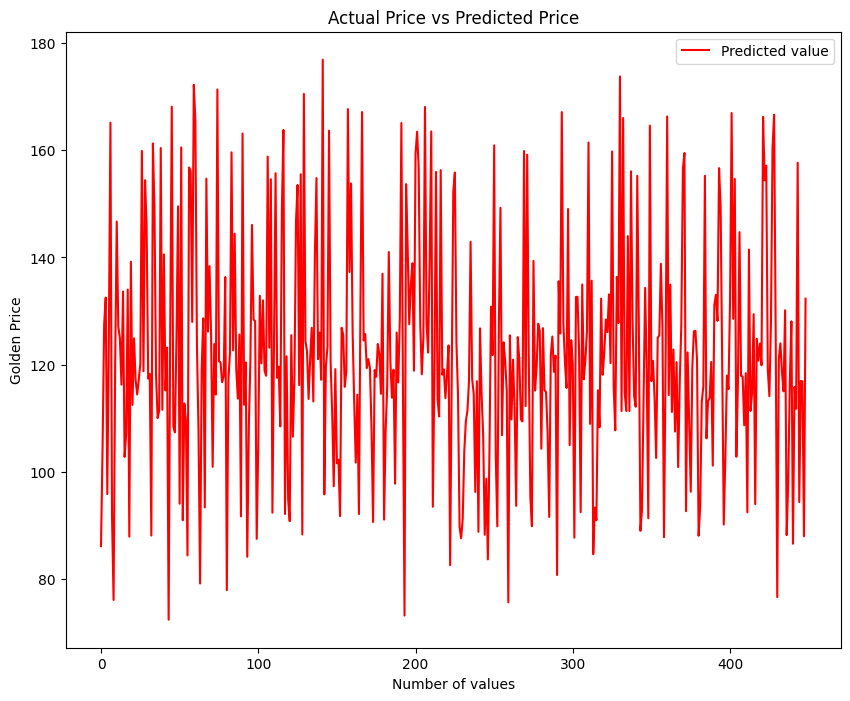

In [32]:
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

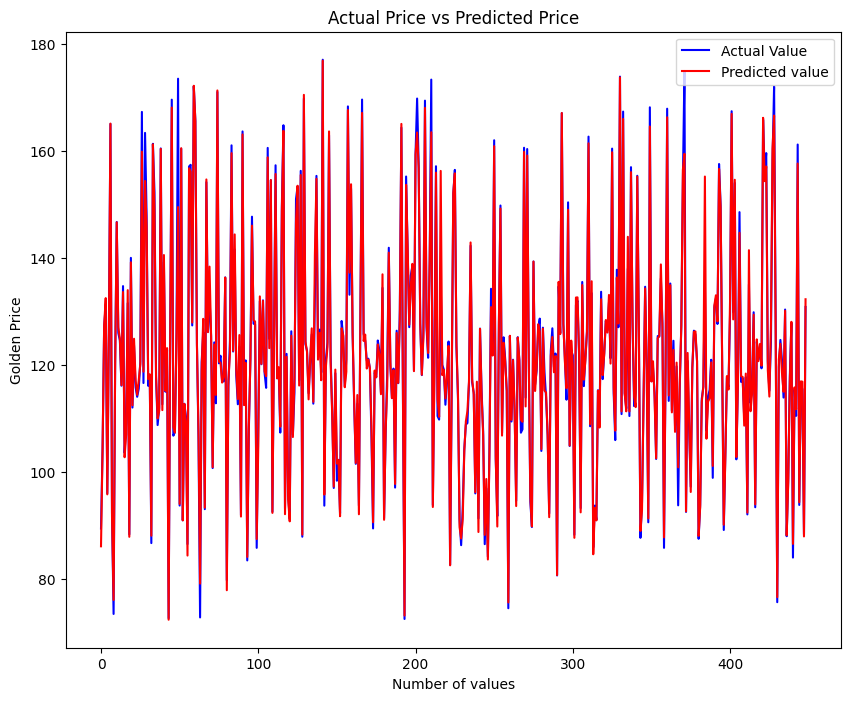

In [33]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

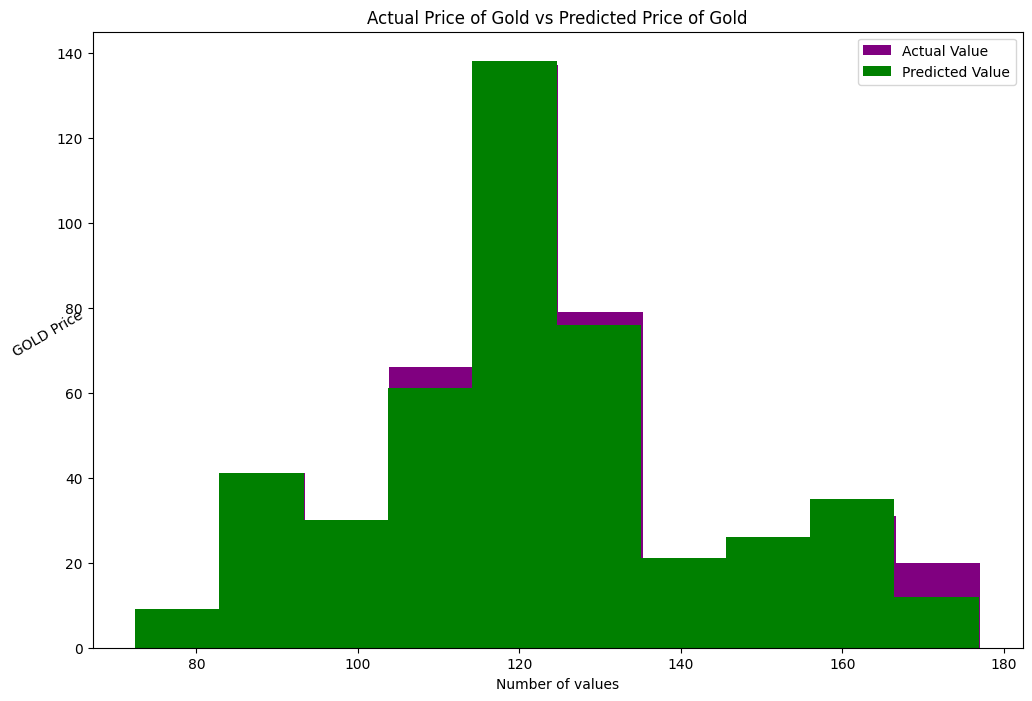

In [34]:
plt.figure(figsize = (12,8))
plt.hist(Y_test, color='purple', label = 'Actual Value')
plt.hist(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()